#Diabetes Dataset


#Import Libraries and Data


In [ ]:
#importing libraries
import numpy as np
import pandas as pd
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
# mount Google Drive in Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import data
diab_df = pd.read_csv('/content/drive/MyDrive/Fall 24/ML/diabetes.csv')

#Exploratory Data Analysis


rows,col: (253680, 22)
columns: [RangeIndex(start=0, stop=253680, step=1), Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')]
datatypes by column: Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                f

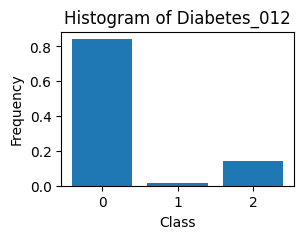

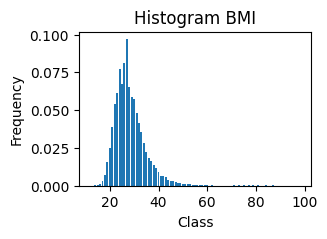

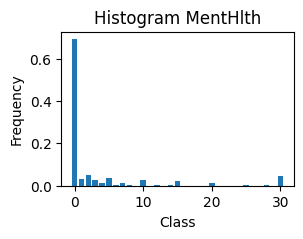

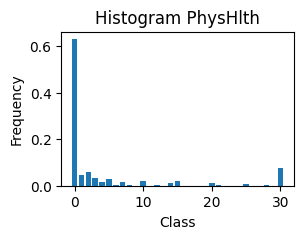

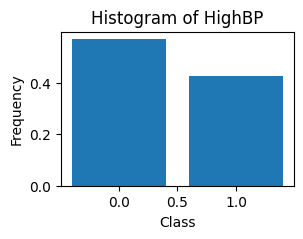

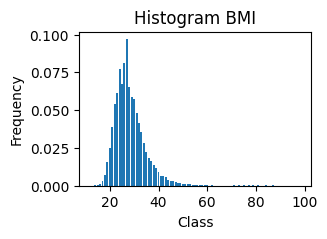

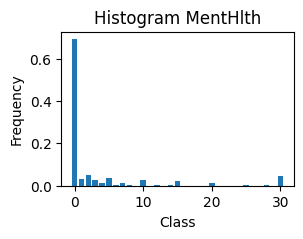

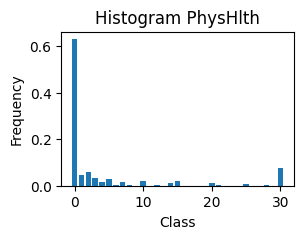

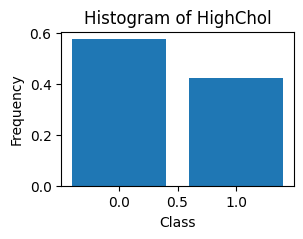

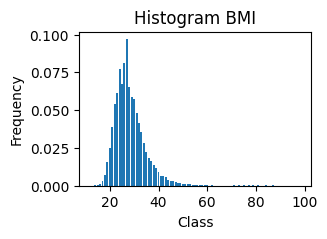

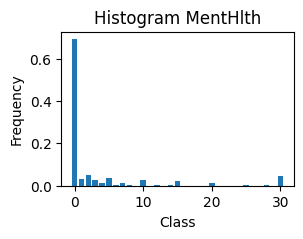

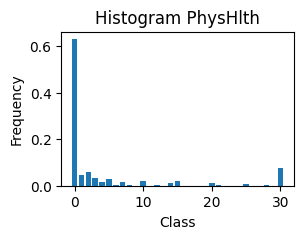

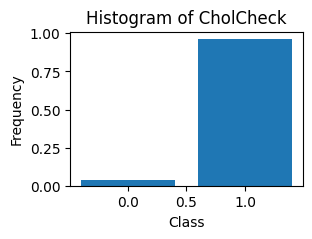

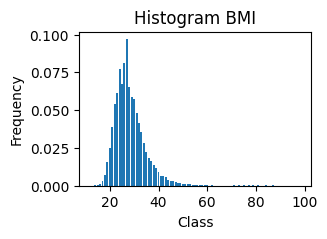

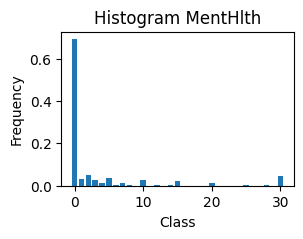

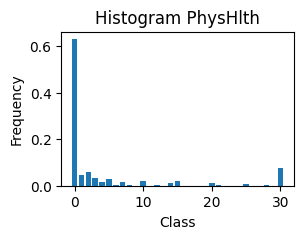

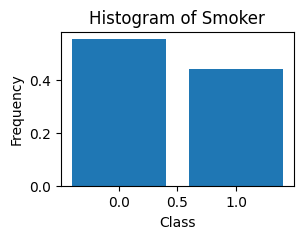

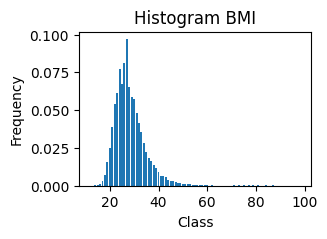

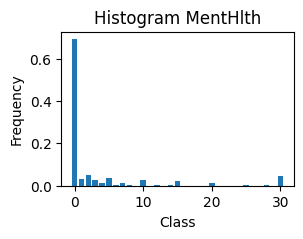

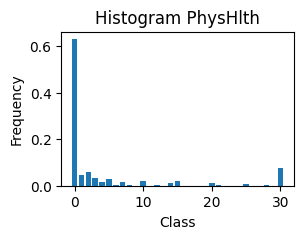

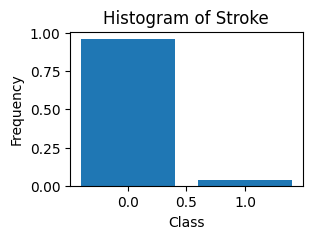

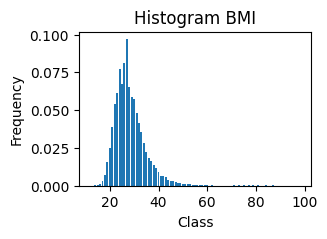

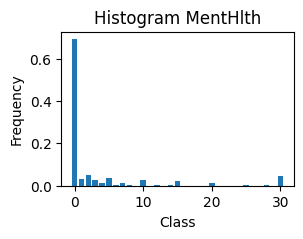

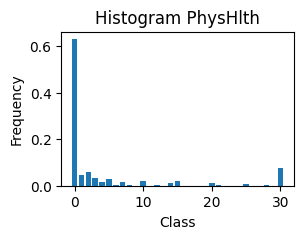

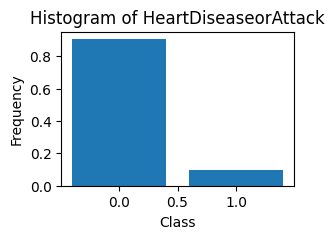

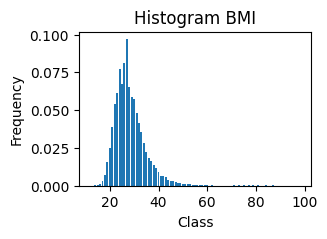

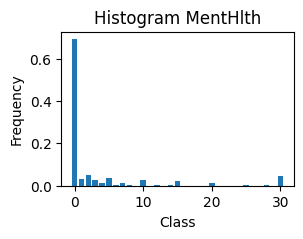

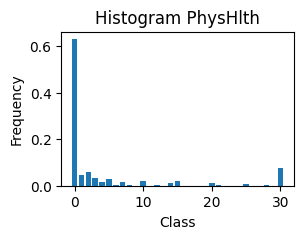

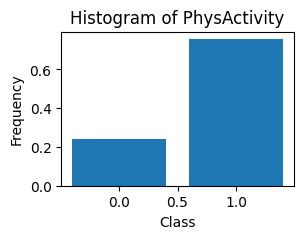

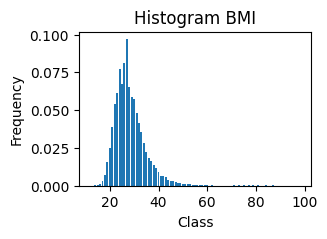

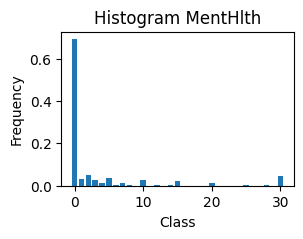

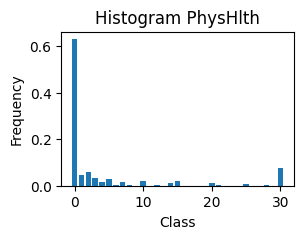

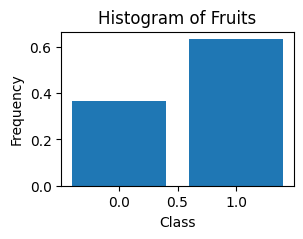

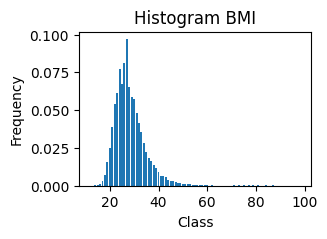

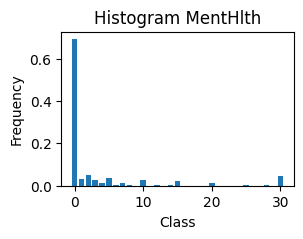

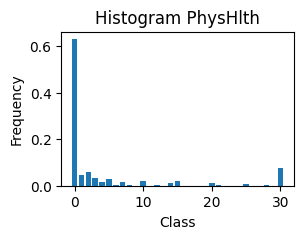

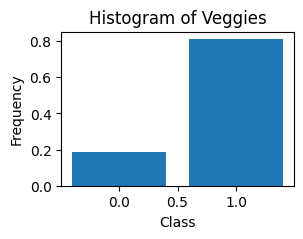

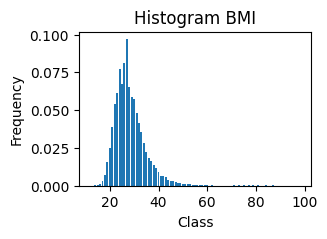

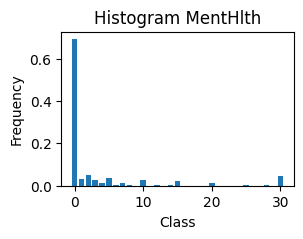

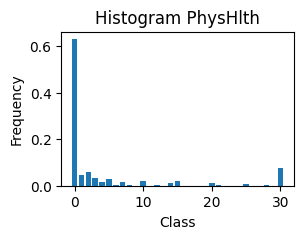

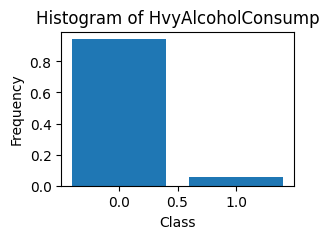

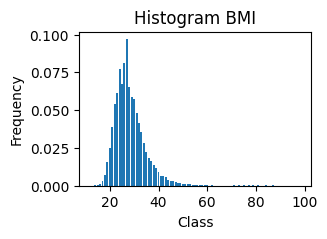

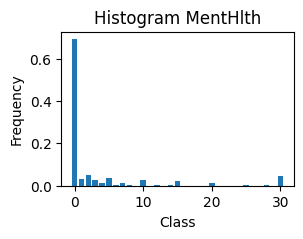

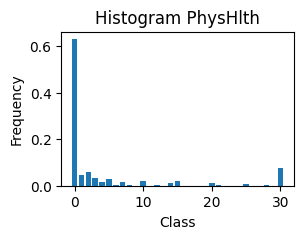

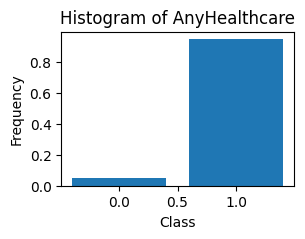

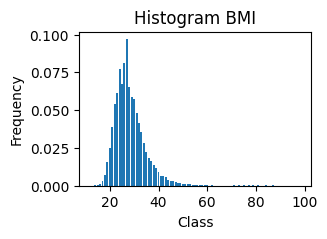

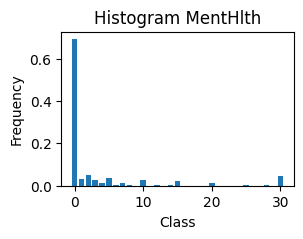

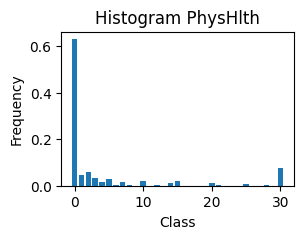

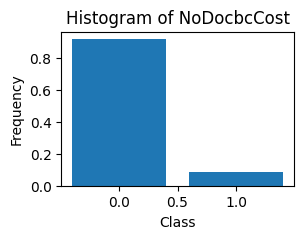

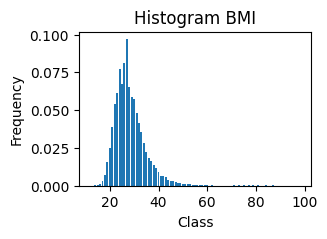

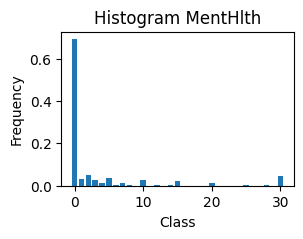

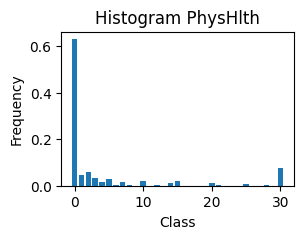

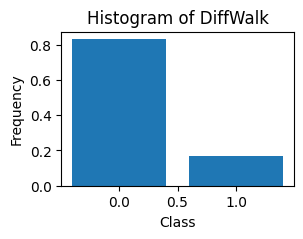

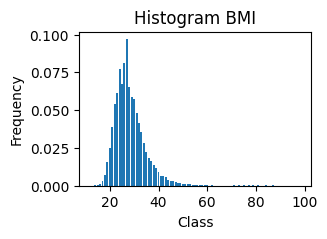

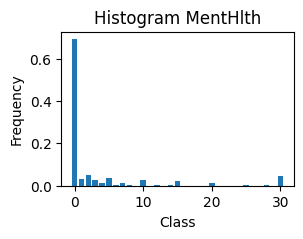

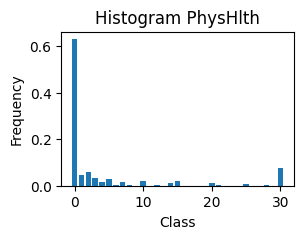

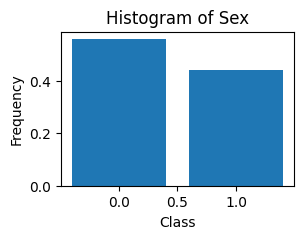

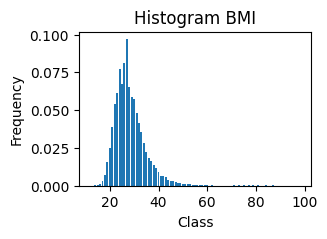

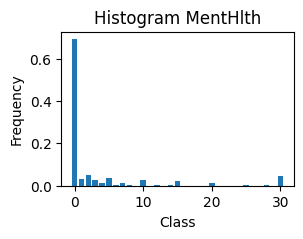

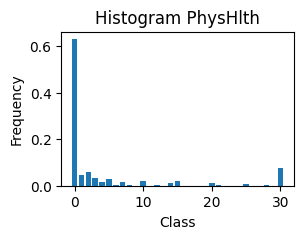

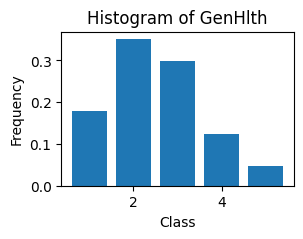

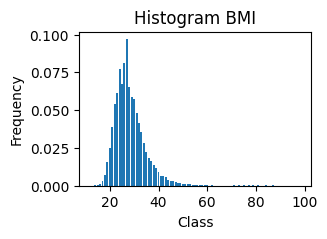

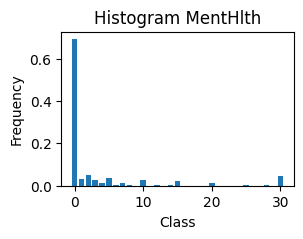

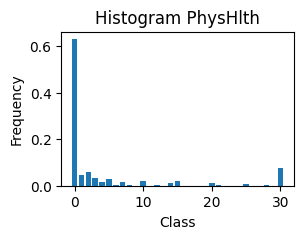

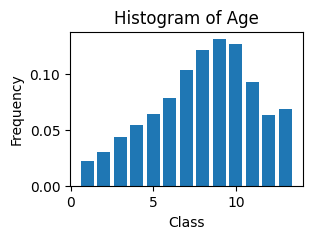

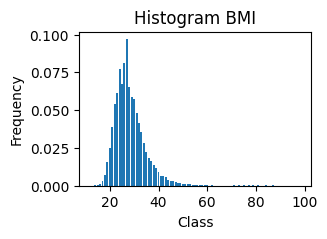

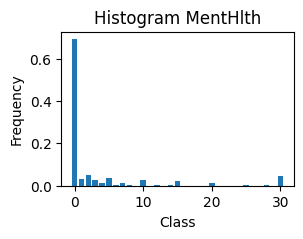

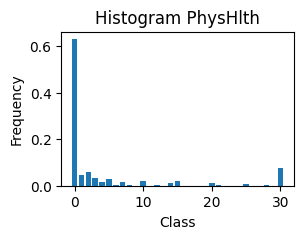

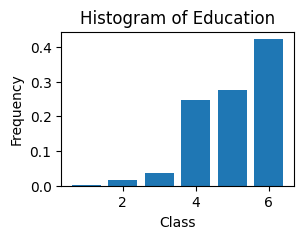

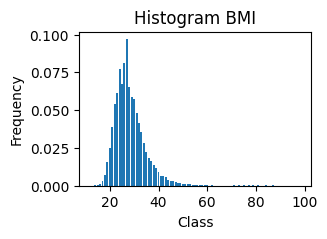

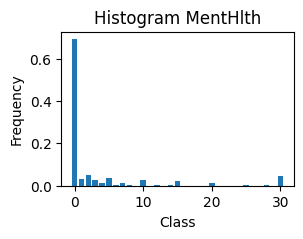

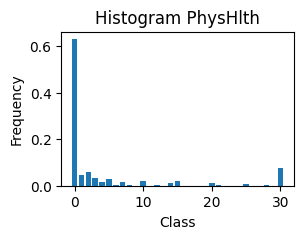

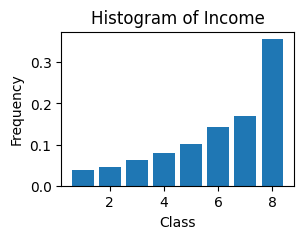

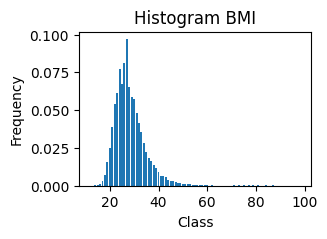

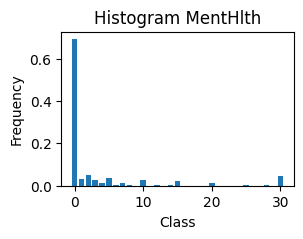

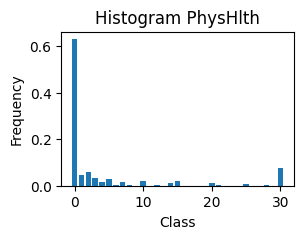

In [ ]:
print('rows,col:',diab_df.shape)
print('columns:',diab_df.axes)
print('datatypes by column:',diab_df.dtypes)
print('NaN values by column:',diab_df.isna().sum())
print('Categorical Variables: Diabetes_012, HighBP, HighChol,CholCheck,Smoker, Stroke, HeartDiseaseorAttack,physActivity,fruits,veggies,HvyAlcoholConsumption, AnyHealthcare, NoDocbcCost, DiffWalk, Sex, GenHlth, Age, Education, Income')
categoricalCol = ['Diabetes_012', 'HighBP', 'HighChol','CholCheck','Smoker', 'Stroke', 'HeartDiseaseorAttack','PhysActivity','Fruits','Veggies','HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex', 'GenHlth', 'Age', 'Education', 'Income']
nonCategoricalCol = ['BMI','MentHlth','PhysHlth']
#check dataset sparsity
sparsity = (diab_df == 0).sum().sum()/diab_df.size
print('sparsity:',sparsity)

#create histograms for each feature and the label
for i in categoricalCol:
 plt.figure(figsize=(3,2))
 plt.bar(diab_df[i].value_counts().index, diab_df[i].value_counts().values/diab_df.shape[0])
 plt.title(f'Histogram of {i}')
 plt.xlabel('Class')
 plt.ylabel('Frequency')
 plt.show()

 for i in nonCategoricalCol:
  plt.figure(figsize=(3,2))
  plt.bar(diab_df[i].value_counts().index, diab_df[i].value_counts().values/diab_df.shape[0])
  plt.title(f'Histogram {i}')
  plt.xlabel('Class')
  plt.ylabel('Frequency')
  plt.show()



Summary:
This dataset has 253680 samples and 22 variables. 21 are independent(and features) and 1 is dependent(and the label). The label, diabetes_012, is a categorical variable that categorizes the patient's condition as not diabetic, pre diabetic, or diabetic. The features seem to mostly be categorical variables, with the majority being nomical and a few being ordinal. When deciding which ML model to use, this will be an important fact to keep in mind. There are 3 numerical variables as well- BMI, MentHlth, and PhysHlth. This dataset seems relatively clean because it does not have any missing values. The sparsity, which indicates the amount of zeros in the dataset is about 45%. From doing research, I was able to conclude that this value is on the higher side, but can occur from data that was collected in the real world. Overfitting might be an issue, which I will have to take into account during feature learning/selection and training the model.

#Pre-Processing


In [ ]:
#remove repeated samples
repeated = diab_df.drop_duplicates(keep='first', inplace=True)

#make sure every sample falls under a valid category for a categorical variable
diabetesVal = (~diab_df['Diabetes_012'].isin([0,1,2])).any()
print('Diabetes_012',diabetesVal)
highBPVal = (~diab_df['HighBP'].isin([0,1])).any()
print('HighBP',highBPVal)
highCholVal = (~diab_df['HighChol'].isin([0,1])).any()
print('HighChol',highCholVal)
cholCheckVal = (~diab_df['CholCheck'].isin([0,1])).any()
print('CholCheck',cholCheckVal)
smokerVal = (~diab_df['Smoker'].isin([0,1])).any()
print('Smoker',smokerVal)
strokeVal = (~diab_df['Stroke'].isin([0,1])).any()
print('Stroke',strokeVal)
heartDisVal = (~diab_df['HeartDiseaseorAttack'].isin([0,1])).any()
print('HeartDiseaseorAttack',heartDisVal)
physActVal = (~diab_df['PhysActivity'].isin([0,1])).any()
print('PhysActivity',physActVal)
fruitVal = (~diab_df['Fruits'].isin([0,1])).any()
print('Fruits',fruitVal)
vegVal = (~diab_df['Veggies'].isin([0,1])).any()
print('Veggies',vegVal)
hvyAlcVal = (~diab_df['HvyAlcoholConsump'].isin([0,1])).any()
print('HvyAlcoholConsump',hvyAlcVal)
healthcareVal = (~diab_df['AnyHealthcare'].isin([0,1])).any()
print('AnyHealthcare',healthcareVal)
noDocVal = (~diab_df['NoDocbcCost'].isin([0,1])).any()
print('NoDocbcCost',noDocVal)
genVal = (~diab_df['GenHlth'].isin([1,2,3,4,5])).any()
print('GenHlth',genVal)
diffWalkVal = (~diab_df['DiffWalk'].isin([0,1])).any()
print('DiffWalk',diffWalkVal)
sexVal = (~diab_df['Sex'].isin([0,1])).any()
print('Sex',sexVal)
ageVal = (~diab_df['Age'].isin([1,2,3,4,5,6,7,8,9,10,11,12,13])).any()
print('Age',ageVal)
eduVal = (~diab_df['Education'].isin([1,2,3,4,5,6])).any()
print('Education',eduVal)
incomeVal = (~diab_df['Income'].isin([1,2,3,4,5,6,7,8])).any()
print('Income',incomeVal)
print('Therefore, all samples are placed in valid categories')

#split into train and test(80/20 split)
y = diab_df['Diabetes_012']
X = diab_df.drop(columns = ['Diabetes_012'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

#standardization of numerical variables
numericalVar = ['BMI', 'MentHlth', 'PhysHlth']

for i in numericalVar: #normalize numerical variables, don't need to do this for y_train and y_test since those var. aren't included
  X_train[i] = (X_train[i] - X_train[i].mean())/(X_train[i].var() ** 0.5)
  X_test[i] = (X_test[i] - X_test[i].mean())/(X_test[i].var() ** 0.5)


#one hot encode nominal categorical separately(to avoid data leakage), ordinal is already encoded correctly
ordinal = ['GenHlth','Age','Education','Income']
nominalMinusLabel = ['HighBP', 'HighChol','CholCheck','Smoker', 'Stroke', 'HeartDiseaseorAttack','PhysActivity','Fruits','Veggies','HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']

X_train = pd.get_dummies(X_train, columns=nominalMinusLabel, dtype=int)
X_test = pd.get_dummies(X_test, columns=nominalMinusLabel, dtype=int )




Diabetes_012 False
HighBP False
HighChol False
CholCheck False
Smoker False
Stroke False
HeartDiseaseorAttack False
PhysActivity False
Fruits False
Veggies False
HvyAlcoholConsump False
AnyHealthcare False
NoDocbcCost False
GenHlth False
DiffWalk False
Sex False
Age False
Education False
Income False
Therefore, all samples are placed in valid categories


To pre-process the data, I removed duplicated samples, and ensured that for all categorical variables, they were classified in a valid category. From EDA, I realized there weren't any missing values, so that did not need to be dealt with. Then, I used sk_learn train test split to split the data for training and testing using a standard 80/20 split, giving a seed of 100 to the random number generator to shuffle and split the data the same way each time. This seemed to be the most efficient way to split a large set of data.

After the train test split, I one-hot encoded nominal categorical variables and standardized the numerical features in X_train and X_test separately, to avoid data leakage.

#Feature Learning/Selection

In [ ]:
#use the l1 regularizer with a linear classifier to select features
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
model = SelectFromModel(LogisticRegression(penalty='l1',C=0.01,solver="saga"))
model.fit(X_train,y_train)
model.get_feature_names_out()

array(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education',
       'Income', 'HighBP_0.0', 'HighBP_1.0', 'HighChol_0.0',
       'HighChol_1.0', 'CholCheck_0.0', 'CholCheck_1.0', 'Smoker_1.0',
       'Stroke_0.0', 'Stroke_1.0', 'HeartDiseaseorAttack_0.0',
       'HeartDiseaseorAttack_1.0', 'Fruits_0.0', 'Fruits_1.0',
       'Veggies_1.0', 'HvyAlcoholConsump_0.0', 'HvyAlcoholConsump_1.0',
       'AnyHealthcare_0.0', 'AnyHealthcare_1.0', 'NoDocbcCost_0.0',
       'DiffWalk_0.0', 'DiffWalk_1.0', 'Sex_0.0', 'Sex_1.0'], dtype=object)

In [ ]:
model2 = SelectFromModel(LogisticRegression(penalty='l1',C=1,solver="saga",max_iter=800))
model2.fit(X_train,y_train)
model2.get_feature_names_out()

array(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education',
       'Income', 'HighBP_0.0', 'HighBP_1.0', 'HighChol_0.0',
       'HighChol_1.0', 'CholCheck_0.0', 'CholCheck_1.0', 'Smoker_1.0',
       'Stroke_0.0', 'Stroke_1.0', 'HeartDiseaseorAttack_0.0',
       'HeartDiseaseorAttack_1.0', 'PhysActivity_0.0', 'PhysActivity_1.0',
       'Fruits_0.0', 'Fruits_1.0', 'Veggies_0.0', 'Veggies_1.0',
       'HvyAlcoholConsump_0.0', 'HvyAlcoholConsump_1.0',
       'AnyHealthcare_0.0', 'AnyHealthcare_1.0', 'NoDocbcCost_0.0',
       'DiffWalk_0.0', 'DiffWalk_1.0', 'Sex_0.0', 'Sex_1.0'], dtype=object)

In [ ]:
model3 = SelectFromModel(LogisticRegression(penalty='l1',C=0.007,solver="saga"))
model3.fit(X_train,y_train)
model3.get_feature_names_out()

array(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education',
       'Income', 'HighBP_0.0', 'HighBP_1.0', 'HighChol_0.0',
       'HighChol_1.0', 'CholCheck_0.0', 'CholCheck_1.0', 'Smoker_0.0',
       'Smoker_1.0', 'Stroke_0.0', 'Stroke_1.0',
       'HeartDiseaseorAttack_0.0', 'HeartDiseaseorAttack_1.0',
       'Fruits_0.0', 'Fruits_1.0', 'Veggies_0.0', 'Veggies_1.0',
       'HvyAlcoholConsump_0.0', 'HvyAlcoholConsump_1.0', 'DiffWalk_0.0',
       'DiffWalk_1.0', 'Sex_0.0', 'Sex_1.0'], dtype=object)

In [ ]:
model4 = SelectFromModel(LogisticRegression(penalty='l1',C=0.004,solver="saga"))
model4.fit(X_train,y_train)
model4.get_feature_names_out()

array(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education',
       'Income', 'HighBP_0.0', 'HighBP_1.0', 'HighChol_0.0',
       'HighChol_1.0', 'CholCheck_0.0', 'CholCheck_1.0',
       'HeartDiseaseorAttack_0.0', 'HeartDiseaseorAttack_1.0',
       'HvyAlcoholConsump_0.0', 'HvyAlcoholConsump_1.0', 'DiffWalk_0.0',
       'DiffWalk_1.0', 'Sex_0.0', 'Sex_1.0'], dtype=object)

In [ ]:
#drop unecessary features
#PhysActivity, AnyHealthcare, NoDocbcCost
X_trainRF = X_train.drop(columns=['PhysActivity_0.0','PhysActivity_1.0','AnyHealthcare_0.0','AnyHealthcare_1.0','NoDocbcCost_0.0','NoDocbcCost_1.0'])
X_testRF = X_test.drop(columns=['PhysActivity_0.0','PhysActivity_1.0','AnyHealthcare_0.0','AnyHealthcare_1.0','NoDocbcCost_0.0','NoDocbcCost_1.0'])

In this section, I used the l1 regularizer for logistic regression to check if there were any features that did not contribute to the final classification. First, I set C=0.01 and found that all features were still significant. As C increased, all features continued to be significant. Decreasing the value of C(C=0.07), 3 features were left out. Decreasing C even more left 7 features out, which might underfit the data. Therefore, I decided to use C=0.07 as the regularization parameter. While this will automatically be reflected in logistic regression, I dropped these 3 features ahead of time for random forest.

#Models

In [ ]:
#Logistic Regression

#training
logReg = LogisticRegression(l1_ratio=0.007,penalty = "elasticnet",solver="saga",max_iter = 2000) #picked to pick the most selective features, making some coeffs 0
logReg.fit(X_train, y_train)

weights = logReg.coef_
b = logReg.intercept_

weights0 = weights[0]
weights1 = weights[1]
weights2 = weights[2]

classifiedLR = pd.DataFrame(index=range(y_test.shape[0]))
classifiedLR['result'] = 0

#testing
#softmax function
npX_test = X_test.values
numx0 = np.dot(npX_test, weights0) + b[0]
numx1 = np.dot(npX_test, weights1) + b[1]
numx2 = np.dot(npX_test, weights2) + b[2]
arr = np.array([np.exp(numx0)/np.exp(numx0+numx1+numx2), np.exp(numx1)/np.exp(numx0+numx1+numx2), np.exp(numx2)/np.exp(numx0+numx1+numx2)])
max = np.argmax(arr,axis=0)
classifiedLR['result'] = max

#Random Forest
from sklearn.ensemble import RandomForestClassifier
#training
rf = RandomForestClassifier(n_estimators=X_trainRF.shape[1], random_state=100)
rf.fit(X_trainRF,y_train)

#testing
predictRF = rf.predict(X_testRF)
classifiedRF = pd.DataFrame(predictRF)

The models I chose for this dataset were Logistic Regression and Random Forest.

Logistic Regression: I used Sci-Kit learn's logistic regression function to train the model. The l1 ratio determined in feature learning was used with a an elasticnet regularizer, to remove some of the features and reduce overfitting. The solver 'saga' was used to minimize the loss. From doing research, I found that 'saga' is a version of 'sag' that is often used for large, sparse datasets which applied perfectly to this project. Then, I used the softmax function to find posterior probabilities of each sample and classify it as either 0, 1, or 2.  

Random Forest: I used Sci-Kit learn's random forest function to train this model as well, using random_state=100 to ensure that the seed allows for consistent results.

#Comparitive Analysis

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


count of each classification: result
0         0.950367
2         0.049633
Name: count, dtype: float64
LR Accuracy: 0.8283612942533237
LR Precision: [0.97327106 0.         0.16737408]
LR Recall: [0.84453705 0.         0.51863218]
LR F1 Score: [0.90434569 0.         0.2530752 ]
count of each classification: 0  
0.0    0.921383
2.0    0.076398
1.0    0.002219
Name: count, dtype: float64
RF Accuracy: 0.8150009791761864
RF Precision: [0.94857384 0.0010101  0.21279004]
RF Recall: [0.84899868 0.00980392 0.42836799]
RF F1 Score: [0.89602831 0.0018315  0.28433689]


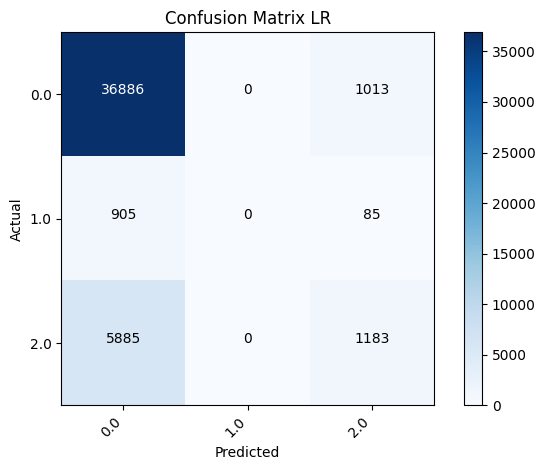

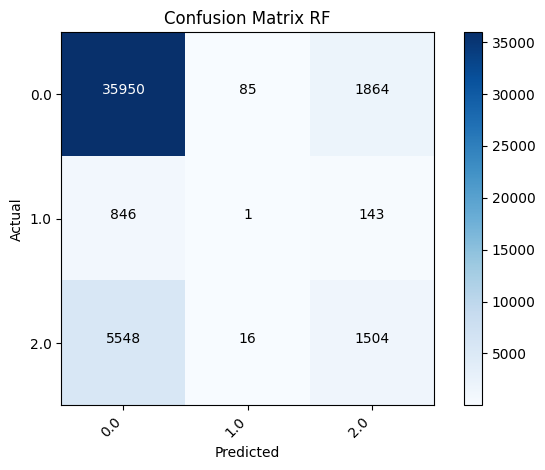

In [ ]:
#Comparitive Analysis of both
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
#Logistic Regression
countLR = classifiedLR.value_counts()/classifiedLR.shape[0]
accuracyLR = accuracy_score(classifiedLR, y_test) #average=none treats each class separately
precisionLR = precision_score(classifiedLR,y_test,average=None)
recallLR = recall_score(classifiedLR,y_test,average=None)
f1LR = f1_score(classifiedLR,y_test,average=None)

print('count of each classification:',countLR)
print('LR Accuracy:',accuracyLR)
print('LR Precision:',precisionLR)
print('LR Recall:',recallLR)
print('LR F1 Score:',f1LR)

#Random Forest
countRF = classifiedRF.value_counts()/classifiedRF.shape[0]
accuracyRF = accuracy_score(classifiedRF, y_test) #average=none treats each class separately
precisionRF = precision_score(classifiedRF,y_test,average=None)
recallRF = recall_score(classifiedRF,y_test,average=None)
f1RF = f1_score(classifiedRF,y_test,average=None)

print('count of each classification:',countRF)
print('RF Accuracy:',accuracyRF)
print('RF Precision:',precisionRF)
print('RF Recall:',recallRF)
print('RF F1 Score:',f1RF)

#Logistic Regression Confusion Matrix
# Confusion matrix
conf_matrixLR = confusion_matrix(y_test, classifiedLR)
categories = y_test.unique()

# Plot the confusion matrix
plt.imshow(conf_matrixLR, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix LR')
plt.colorbar()
tick_marks = np.arange(len(categories))
plt.xticks(tick_marks, categories, rotation=45, ha='right')
plt.yticks(tick_marks, categories)

# Add text annotations
for i in range(conf_matrixLR.shape[0]):
    for j in range(conf_matrixLR.shape[1]):
        plt.text(j, i, format(conf_matrixLR[i, j], 'd'),
                 horizontalalignment='center',
                 color='white' if conf_matrixLR[i, j] > conf_matrixLR.max() / 2 else 'black')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

#Random Forest Confusion Matrix
# Confusion matrix
conf_matrixRF = confusion_matrix(y_test, classifiedRF)
cat = y_test.unique()

# Plot the confusion matrix
plt.imshow(conf_matrixRF, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix RF')
plt.colorbar()
tick_marks = np.arange(len(cat))
plt.xticks(tick_marks, cat, rotation=45, ha='right')
plt.yticks(tick_marks, cat)

# Add text annotations
for i in range(conf_matrixRF.shape[0]):
    for j in range(conf_matrixRF.shape[1]):
        plt.text(j, i, format(conf_matrixRF[i, j], 'd'),
                 horizontalalignment='center',
                 color='white' if conf_matrixLR[i, j] > conf_matrixRF.max() / 2 else 'black')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()



Overall, the accuracy for both methods is roughly the same at about 82%. Both models seem to correctly classify class 0. However, it struggles at classifying 1 and 2. The results for class 1 were especially surprising to see because Logistic Regression was not able to classify any of the labels as 1- let alone classifying them correctly. Random Forest was only able to classify 1 sample correctly under class 1. Since both of these models struggled with class 1, it indicates that there might have been some type of bias in the original dataset. Looking back to the histograms of pre-processing, this makes sense since there are significantly more samples classified in class 0 than class 1 and 2 combined. In order to improve this model, we could try to obtain more data samples for class 1 and 2.

#Ethical Issues


When dealing with healthcare, there are a number of ethical issues to consider. First, obtaining patient data is difficult. All laws related to patient privacy must be followed. This can lead to bias in datasets. For example, healthy patients might be more willing to provide data than those suffering with a condition. This might have been the case for this Diabetes dataset. Sharing results also falls under this privacy concern. For example, sharing performance metrics might give away information patients aren't comfortable with even if it's anonymous.

#Bibliography

https://www.analyticsvidhya.com/blog/2023/07/how-to-deal-with-sparse-datasets/#:~:text=Although%20there%20are%20no%20set,of%20analysis%20and%20modeling%20tasks.
https://scikit-learn.org/1.5/modules/sgd.html#sgd-mathematical-formulation
https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.confusion_matrix.html
https://ioflood.com/blog/train-test-split-sklearn/#:~:text=Let's%20dive%20in.&text=In%20the%20above%20code%2C%20X,dataset%20and%20then%20splits%20it.
https://medium.com/@arnavr/scikit-learn-solvers-explained-780a17bc322d#:~:text=The%20SAGA%20solver%20is%20a,option%20(i.e.%20L1%20Regularization).
https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html
https://scikit-learn.org/1.5/modules/model_evaluation.html
